In [129]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
uploaded = files.upload()

Saving vaccine.csv to vaccine (3).csv


In [131]:
df = pd.read_csv("vaccine.csv", encoding='cp949')

In [132]:
data = df.loc[0:196, ["접종일", "4차접종률(%)"]]

In [133]:
x = data["접종일"][::-1]
x = x.to_numpy()
y = data["4차접종률(%)"][::-1]
y = y.to_numpy()

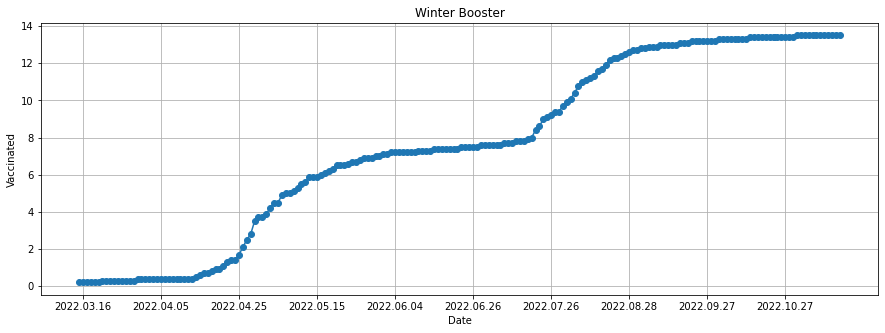

In [134]:
plt.figure(num=0,figsize=[15,5])
plt.plot(x,y,marker="o")
plt.title("Winter Booster")
plt.xlabel("Date")
plt.ylabel("Vaccinated")
plt.xticks(np.arange(1, 201, 20))
plt.grid()
plt.show()

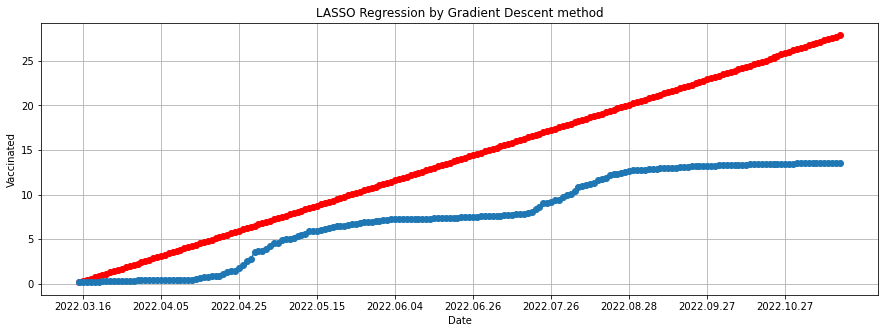

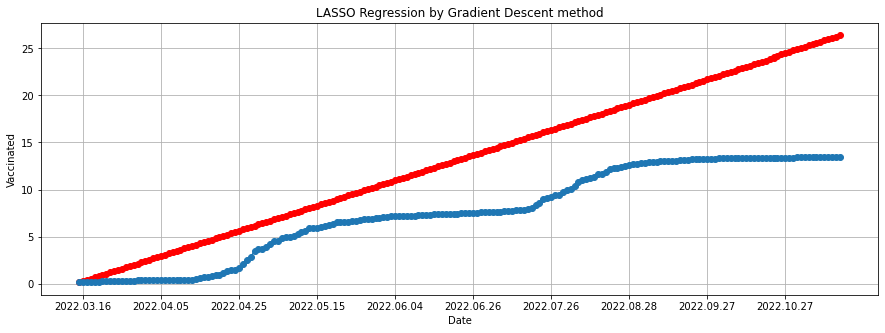

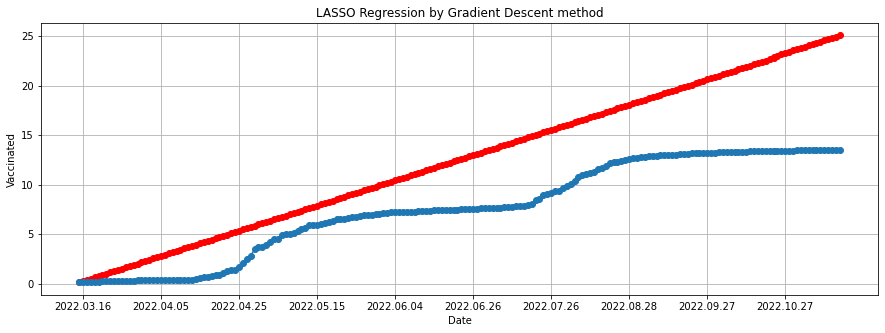

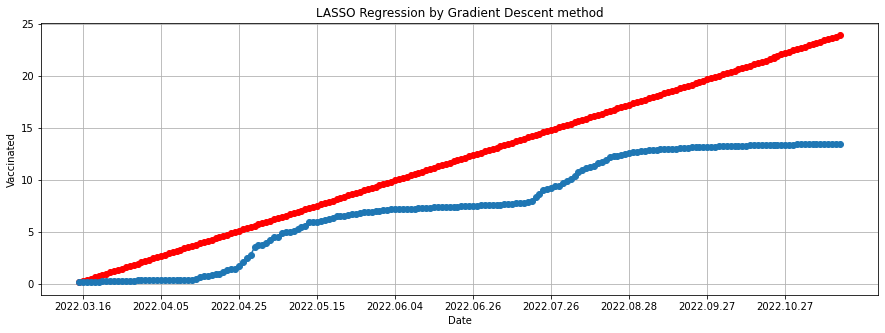

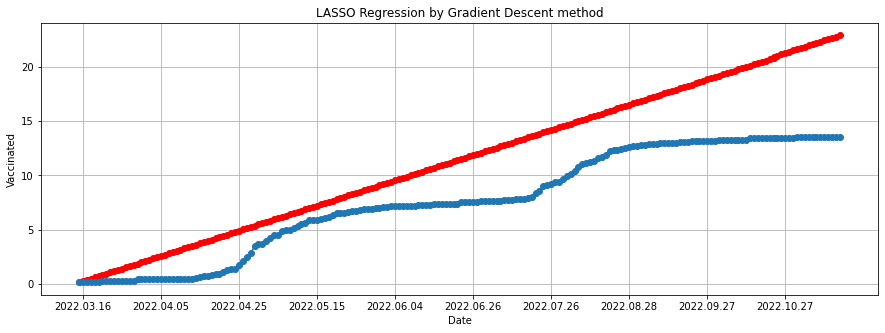

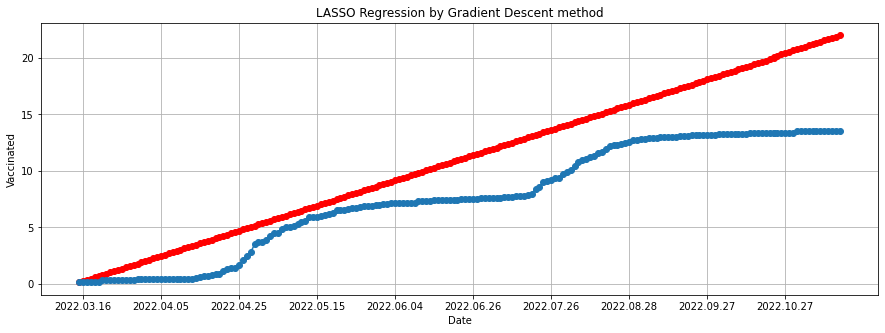

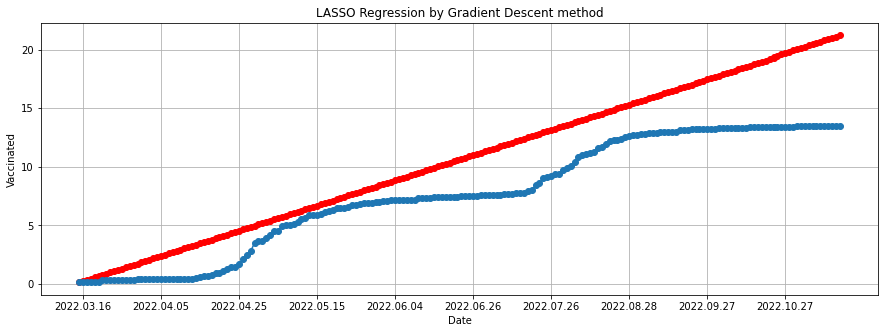

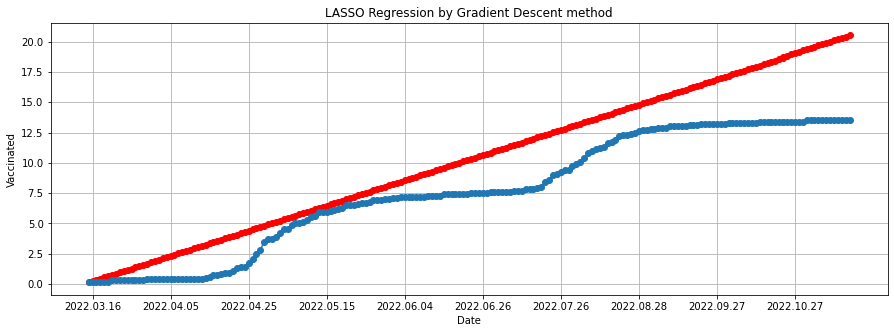

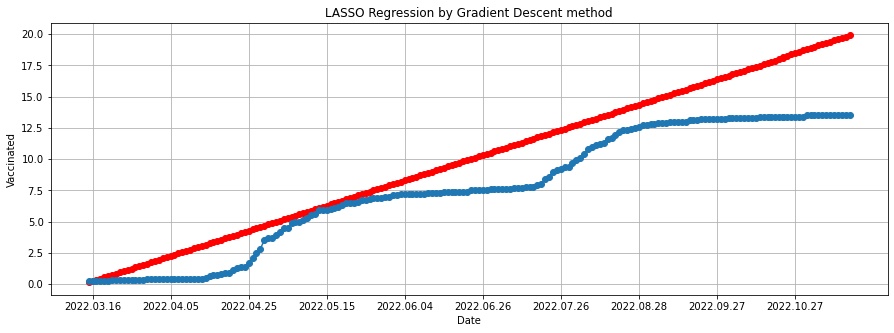

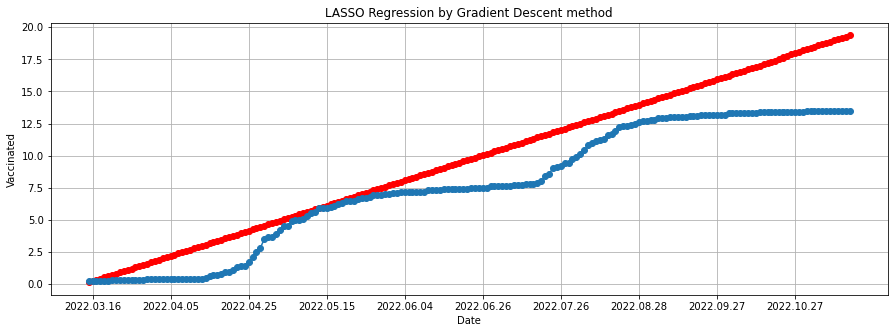

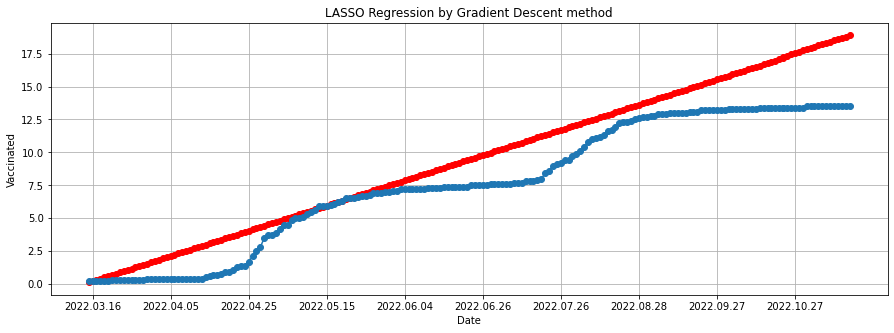

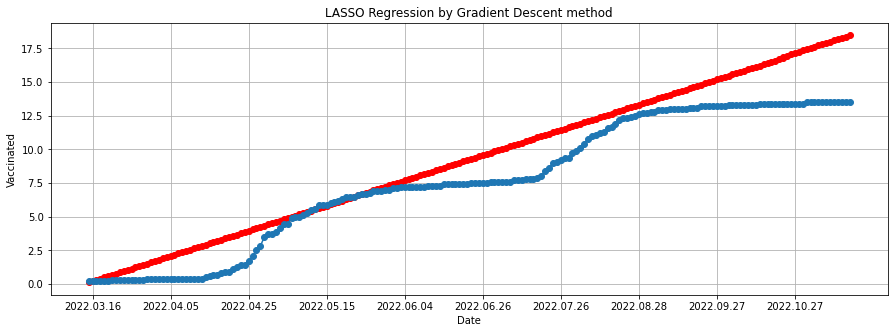

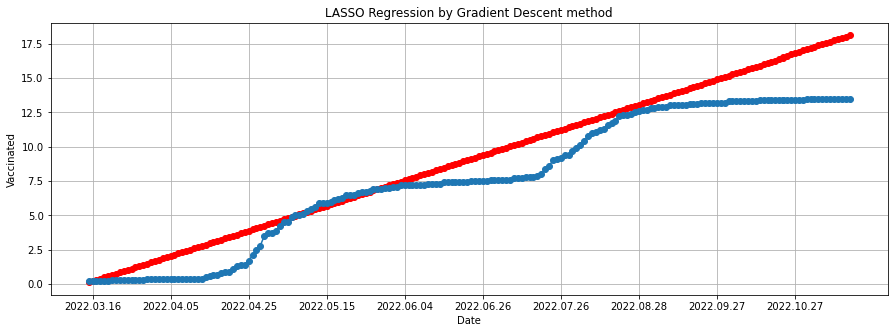

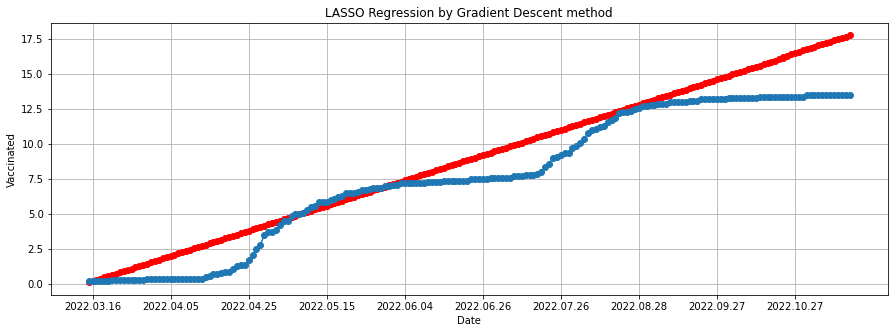

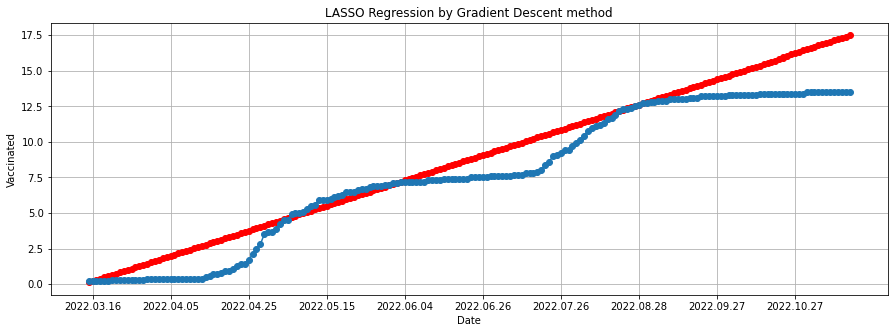

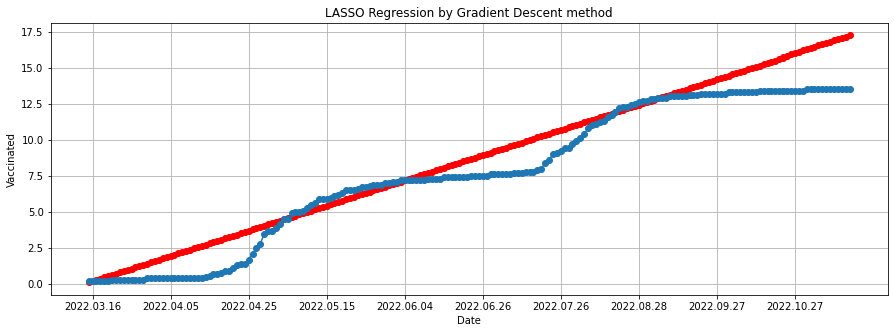

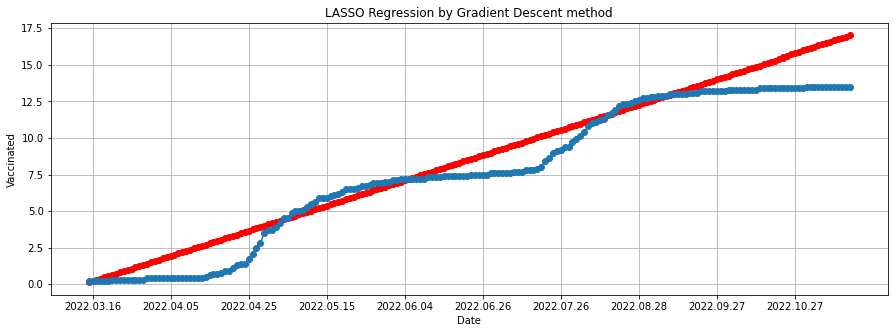

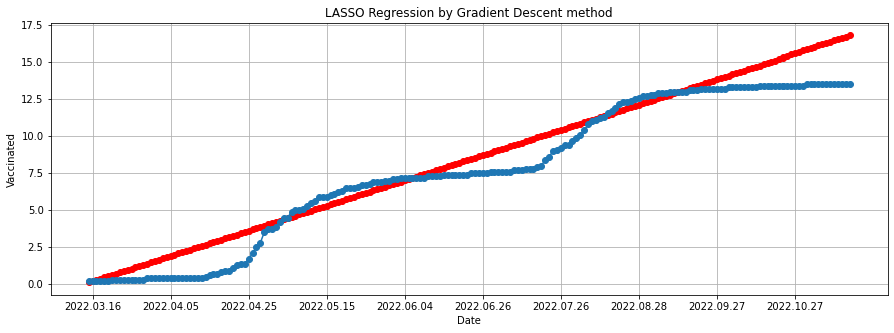

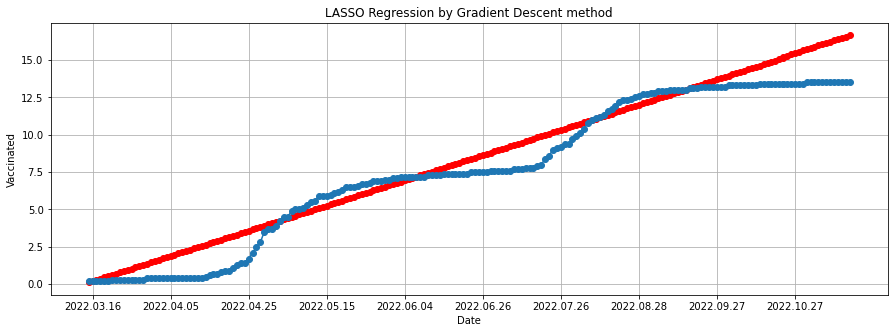

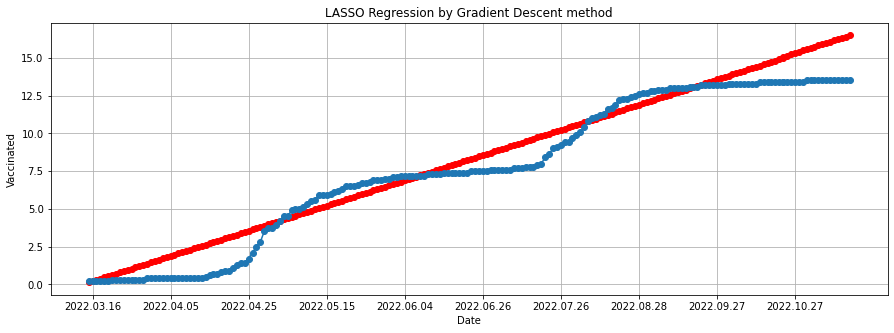

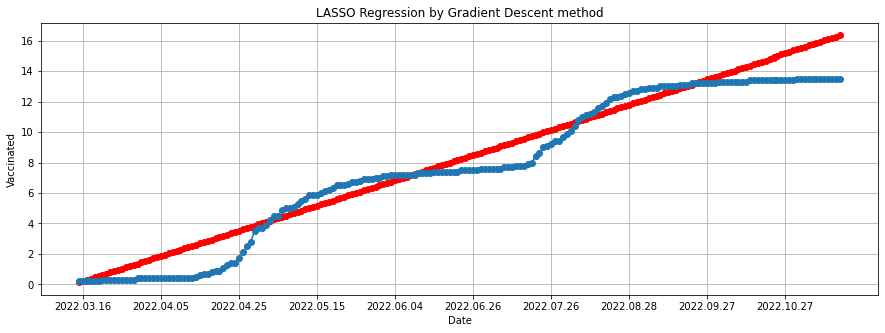

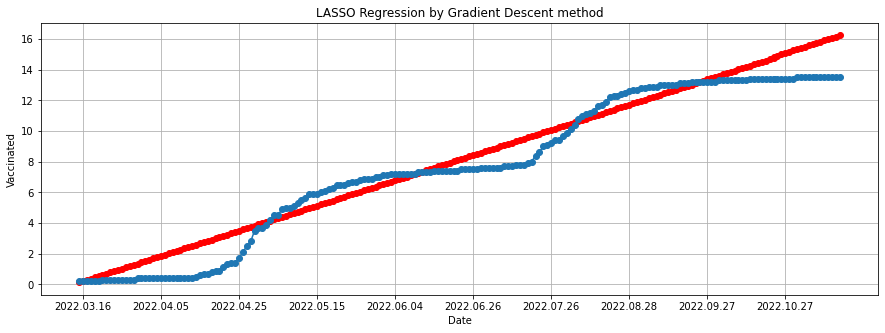

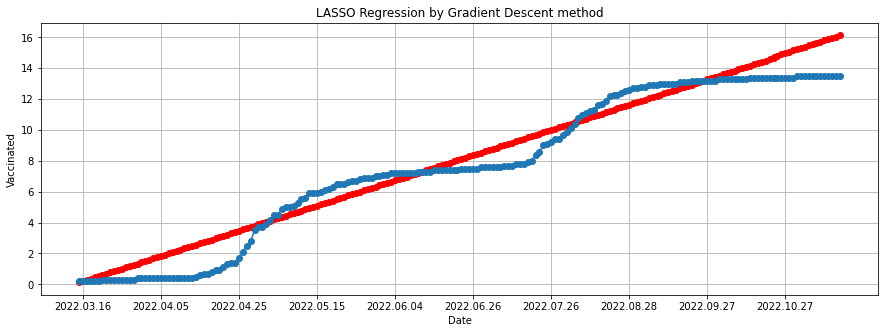

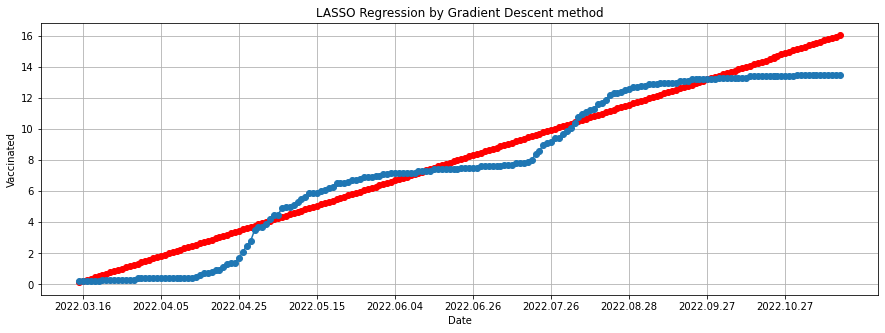

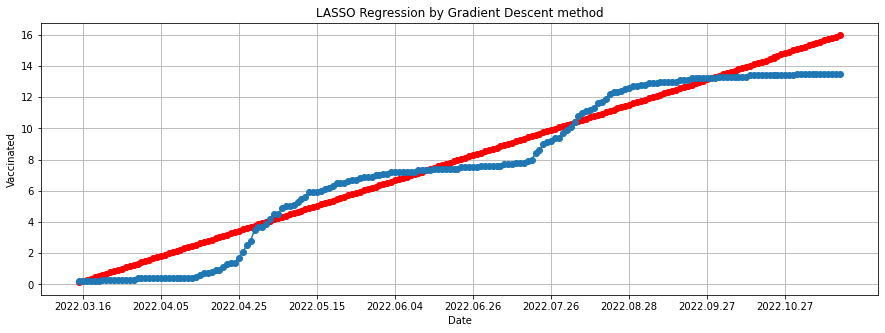

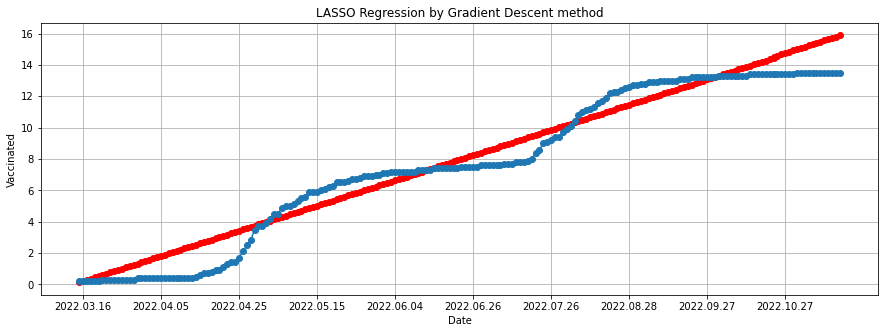

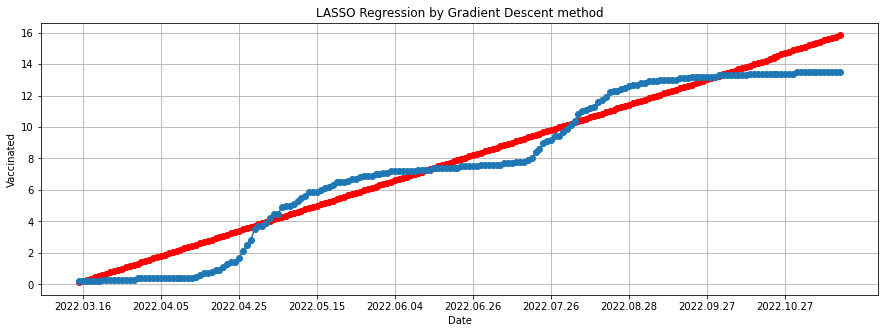

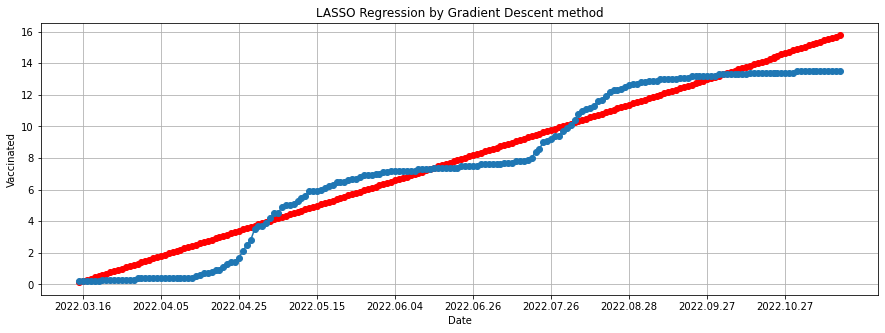

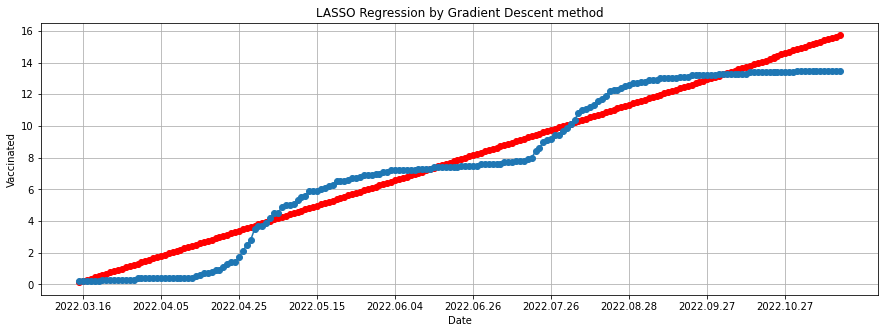

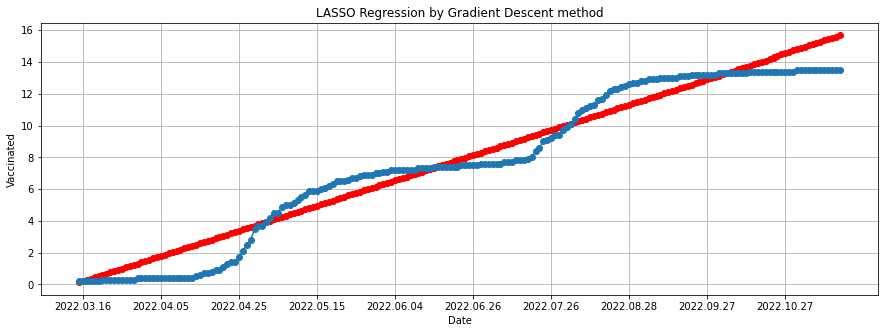

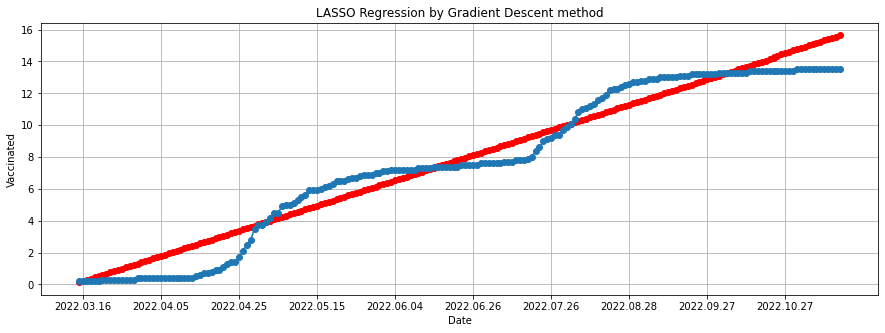

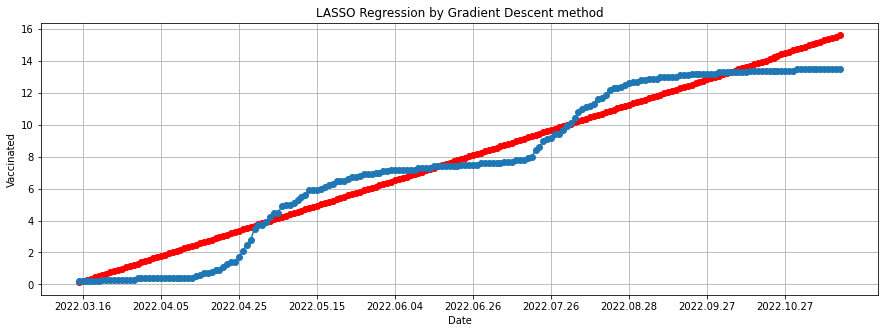

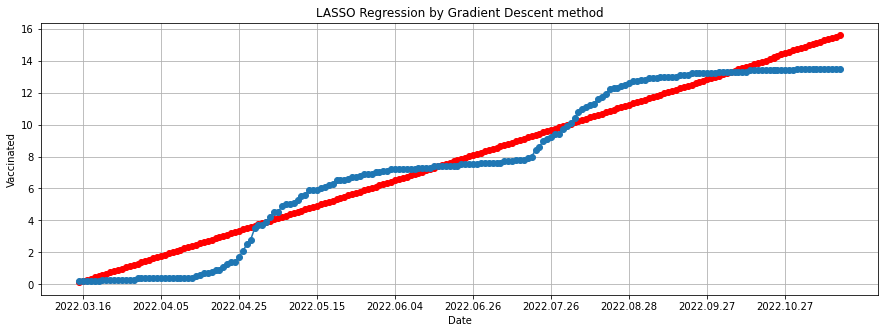

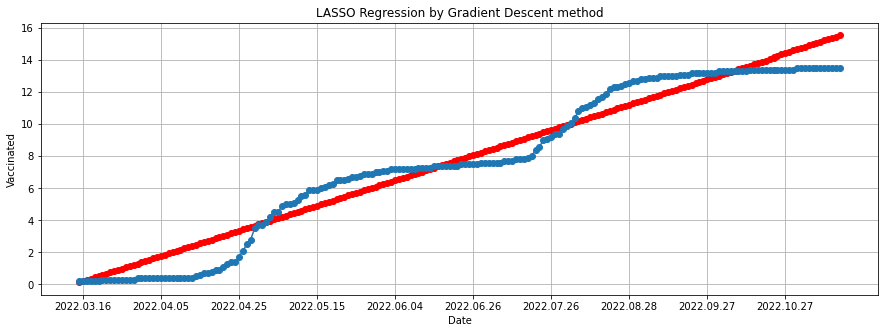

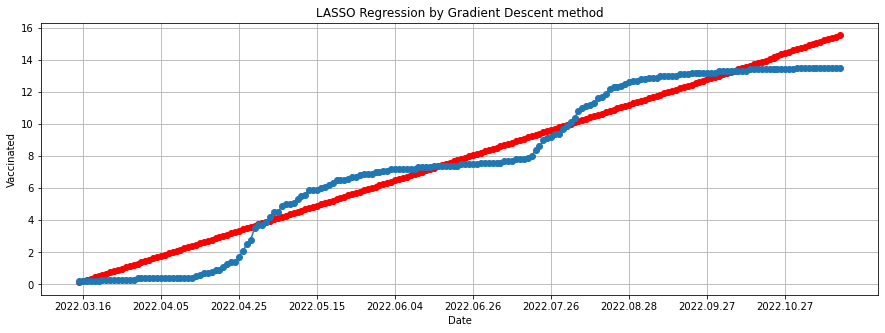

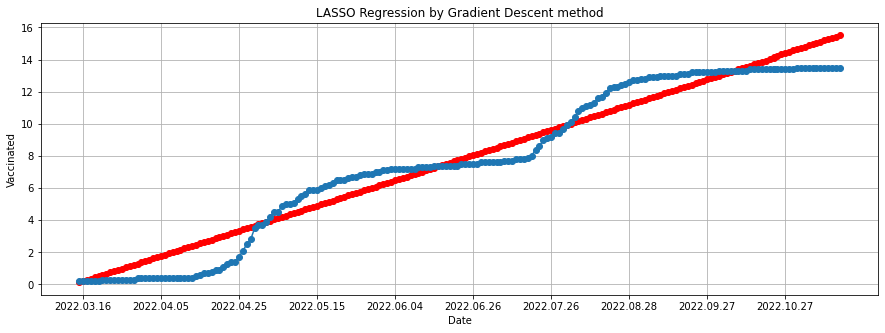

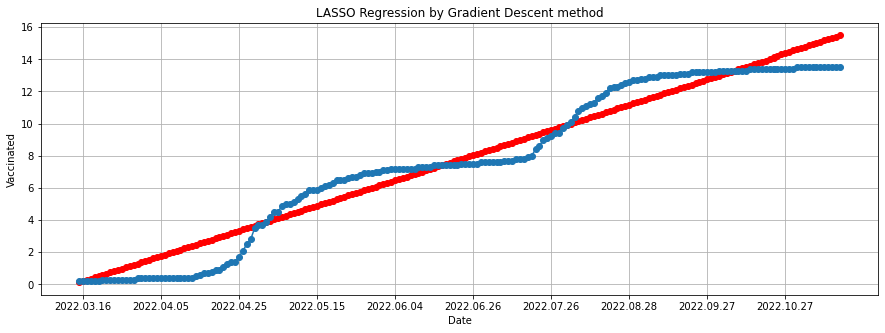

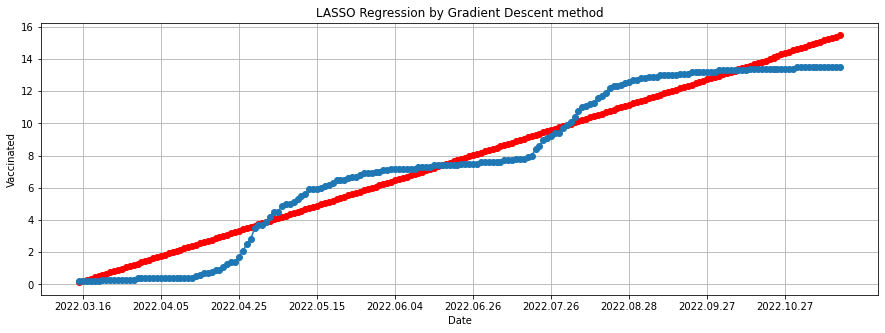

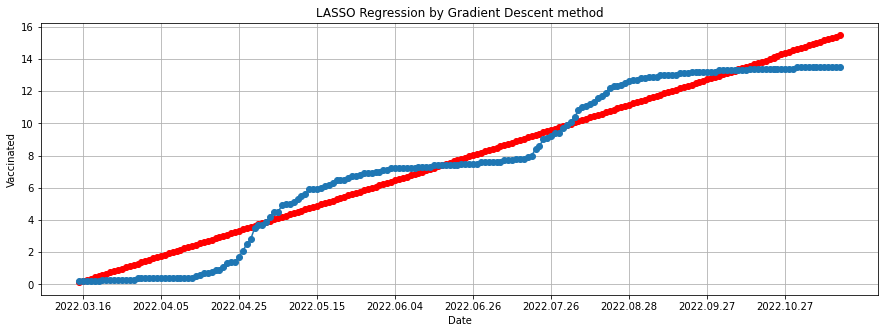

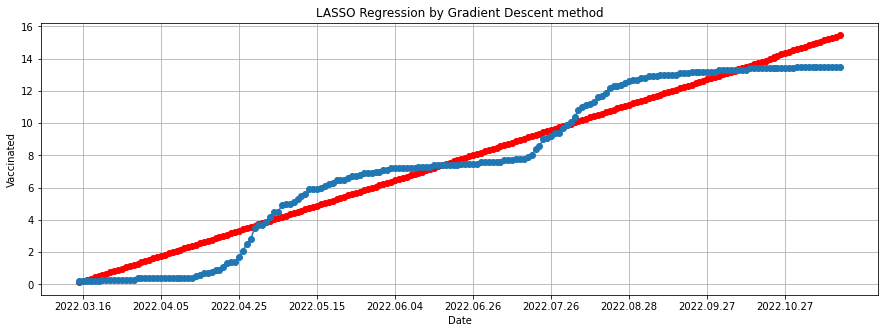

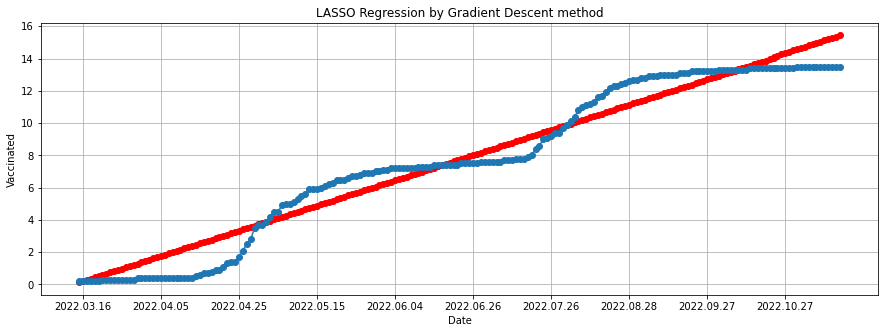

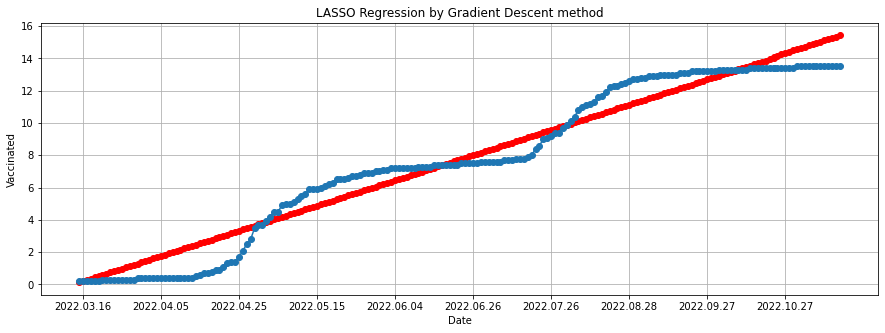

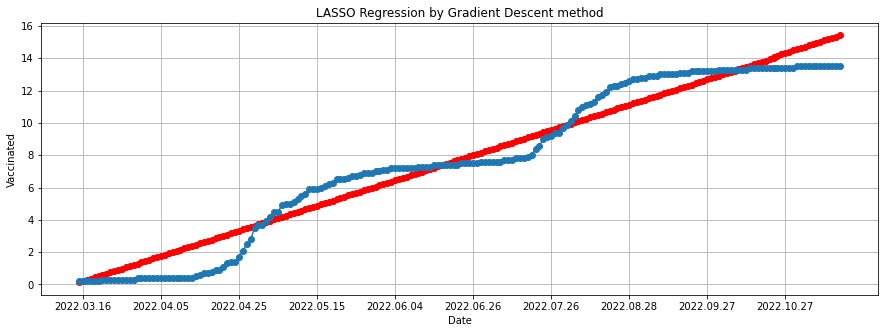

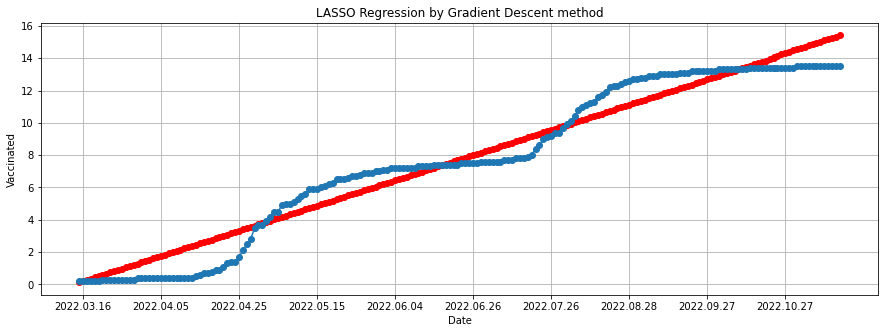

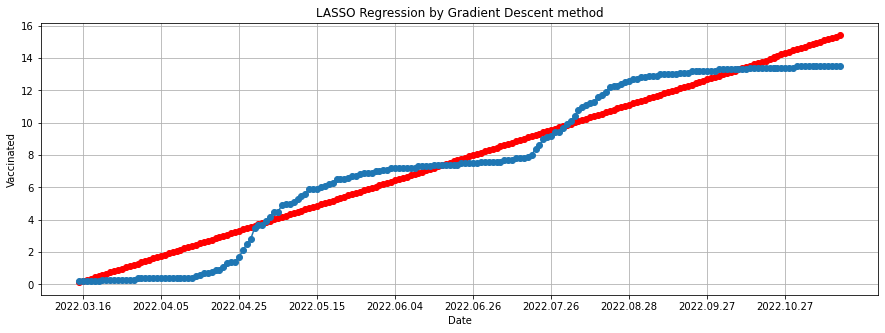

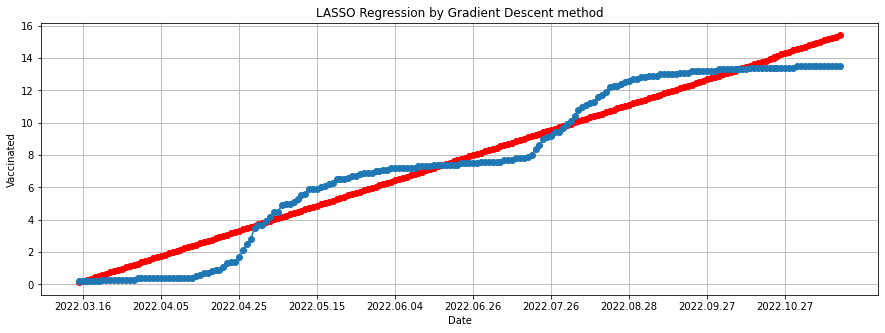

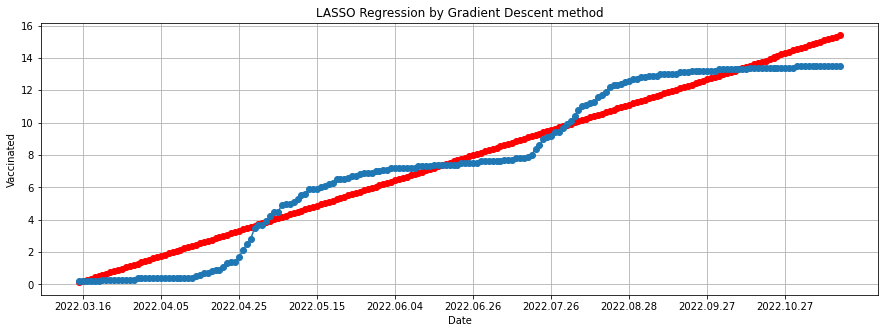

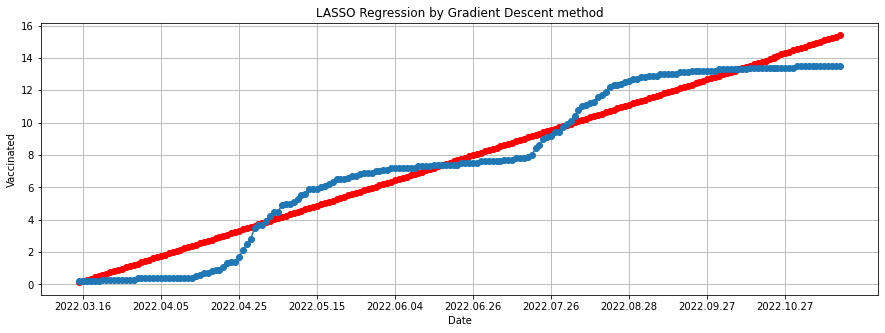

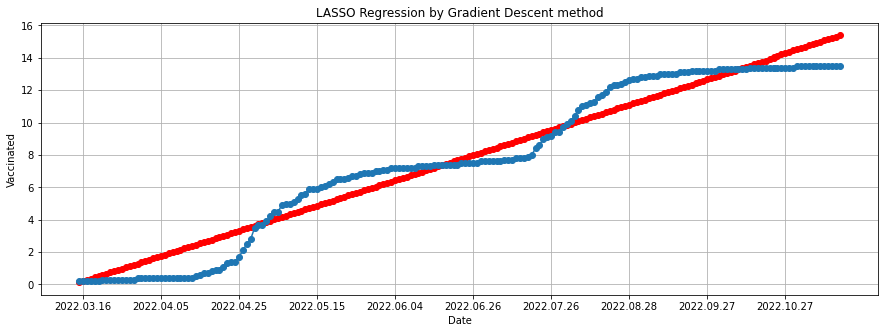

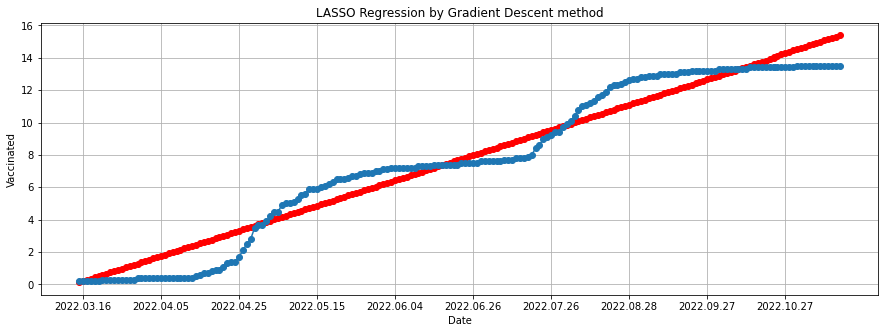

weight:  [0.07786088]
bias:  [0.1232113]


In [138]:
w = 1/6*np.random.rand(1)
b = 1/6*np.random.rand(1)

alpha = 0.00000005
lamb = 0.1

N = np.size(y)
x_idx = np.arange(0, np.size(x))

input_ = x_idx

for i in range(0,50):
    for k in range(0,N):
        output = np.dot(np.asarray([w,b]).T,np.asarray([input_[k],1]))
    
        dedw = input_[k]
    
        dLde = output - y[k]
    
        dedb = 1
    
        dLdw = dLde*dedw
    
        dLdb = dLde*dedb
    
        if w > 0:
            w = w - alpha*dLdw - alpha*lamb
        elif w < 0:
            w = w - alpha*dLdw + alpha*lamb
    
        b = b - alpha*dLdb
    
    plt.figure(num=0,figsize=[15,5])
    plt.plot(x,w*x_idx+b,'-r', x,y,marker="o")
    plt.title('LASSO Regression by Gradient Descent method')
    plt.xlabel("Date")
    plt.ylabel("Vaccinated")
    plt.xticks(np.arange(1, 201, 20))
    plt.grid()
    plt.show()

print("weight: ", w)
print("bias: ", b)